# TODO

- Background Study

- EDA

- Develop Models

- Evaluate Models

- Develop web based front end

- Finalize latex report

## EDA Checklist:

- ReadData

- Dataset Description

- Pairplot

- outlier


1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

# Dataset Description

**id** : Unique identifier for each data entry\
**name** : Name of the Pokémon\
**rank** : Rank or evolutionary stage\
**generation** : The generation in which the Pokémon was introduced\
**evolves_from** : Name of the Pokémon from which it evolves (if applicable)\
**type1** : Primary type of the Pokémon\
**type2** : Secondary type of the Pokémon (if it has one)\
**hp** : Base HP (Hit Points)\
**atk** : Base Attack stat\
**def** : Base Defense stat\
**spatk** : Base Special Attack stat\
**spdef** : Base Special Defense stat\
**speed** : Base Speed stat\
**total** : Total base stats\
**height** : Height of the Pokémon\
**weight** : Weight of the Pokémon\
**abilities** : List of the Pokémon's abilities\
**desc** : Description or characteristics of the Pokémon


In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
import random
import joblib


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix


In [2]:
# Read the CSV file
df = pd.read_csv("./pokemons.csv")
pokemon_data = df.copy().drop(columns=['id','name', 'evolves_from', 'generation','type1', 'type2', 'abilities', 'desc'])
#each pokemon only has attributes: ,rank,hp,atk,def,spatk,spdef,speed,total,height,weight
pokemon_data
pokemon_data = pd.DataFrame(pokemon_data)

### Data Cleaning

In [3]:
## replace all mythical pokemon rank with lengendary rank
pokemon_data = pokemon_data.replace("mythical", "legendary")
pokemon_data = pokemon_data.replace("baby", "ordinary")

In [4]:
## check if there are any mythical ranks left in the dataframe
## nothing should show up
for i in pokemon_data['rank']:
    if i == "mythical":
        print(i)

## Adding more data

In [5]:
# Assuming you have a DataFrame named 'pokemon_data'
# Create an empty list to store the augmented data
big_pokemon_data = []

max_stat_value = 63

for i in range(len(pokemon_data)):
    # Create a copy of the original datapoint
    if pokemon_data.loc[i]['rank'] == 'legendary':
        k = 100
    else:
        k = 10
    for z in range(k):
        new_pokemon = pokemon_data.loc[i].copy()  # Use the copy method to avoid SettingWithCopyWarning

        # Get the randomly chosen datapoint
        tot = 127
        maxx = 63
        count = 0

        stats = [0, 0, 0, 0, 0, 0]
        while count != 0:
            while True:
                random_index = random.randint(2, 7)
                if stats[random_index-2] != max_stat_value:
                    break
            new_stat_value = random.randint(1, max_stat_value - stats[random_index-2] - count)
            stats[random_index-2] += new_stat_value
            count -= new_stat_value

        count = 0
        while count != 0:
            while True:
                random_index = random.randint(2, 7)
                if stats[random_index-2] != max_stat_value:
                    break
            new_stat_value = random.randint(1, max_stat_value - stats[random_index-2] - count)
            stats[random_index-2] += new_stat_value
            count -= new_stat_value

        for j in range(6):
            new_pokemon[j+2] += stats[j]

        # Append the altered datapoint to the new dataset
        big_pokemon_data.append(new_pokemon)


In [6]:
big_pokemon_data = pd.DataFrame(big_pokemon_data)

## EDA

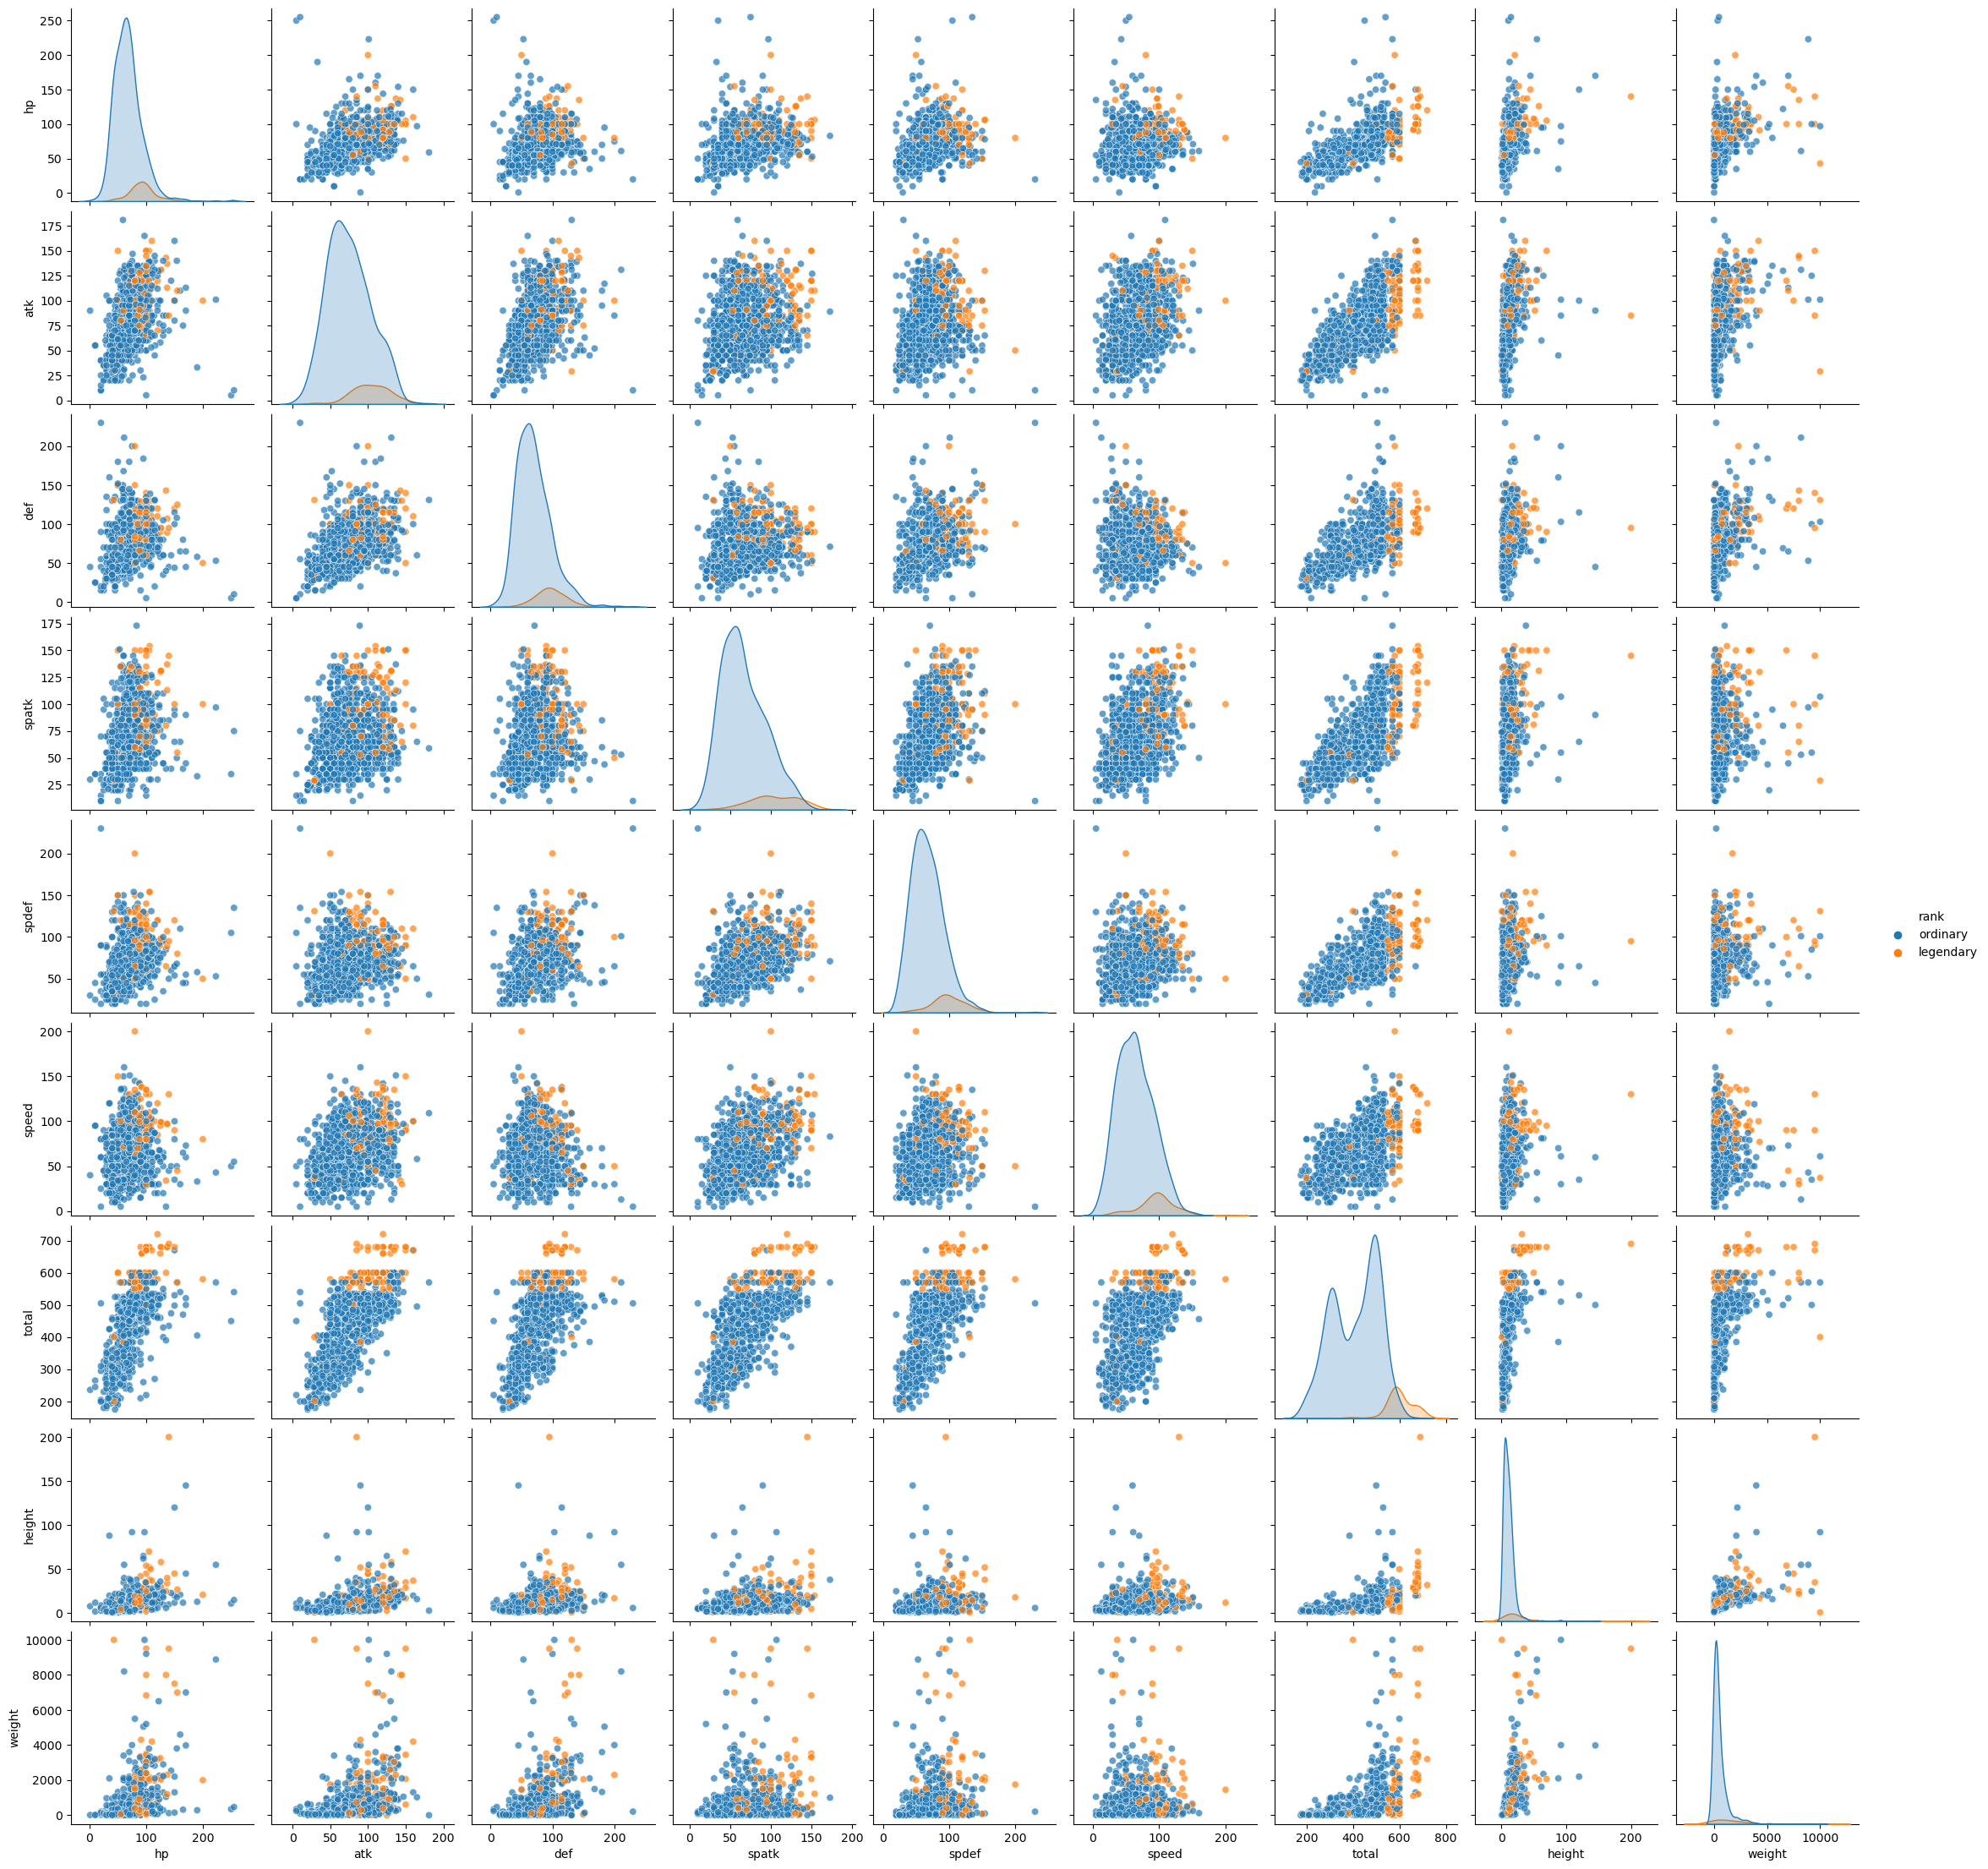

In [7]:
sns.pairplot(pokemon_data, hue='rank', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

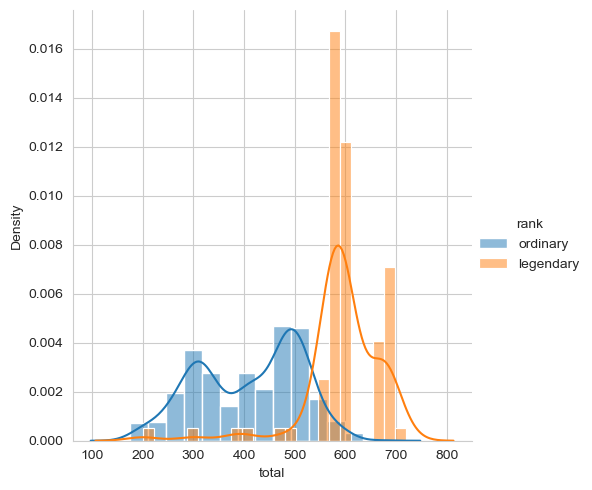

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(pokemon_data,hue="rank",height = 5) \
    .map(sns.histplot,"total", kde=True,stat = "density",kde_kws=dict(cut=3)) \
    .add_legend()
plt.show()

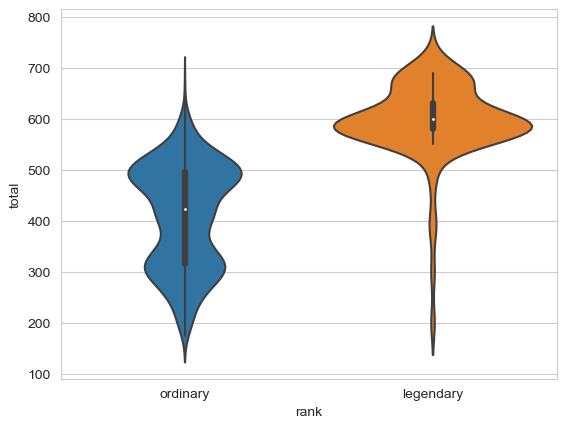

In [9]:
sns.violinplot(x='rank', y='total', data=pokemon_data)
plt.show()

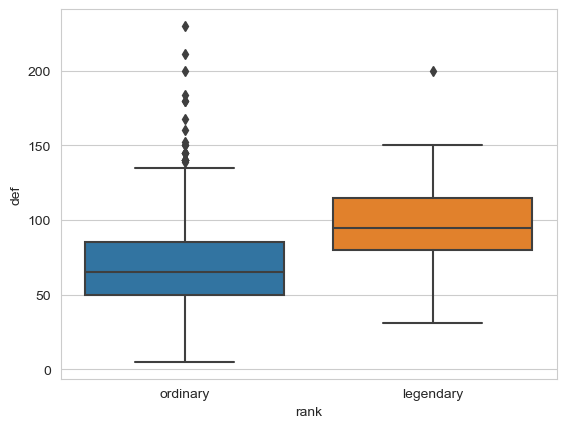

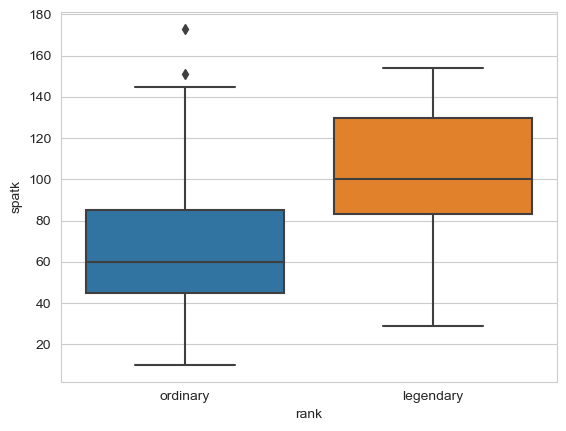

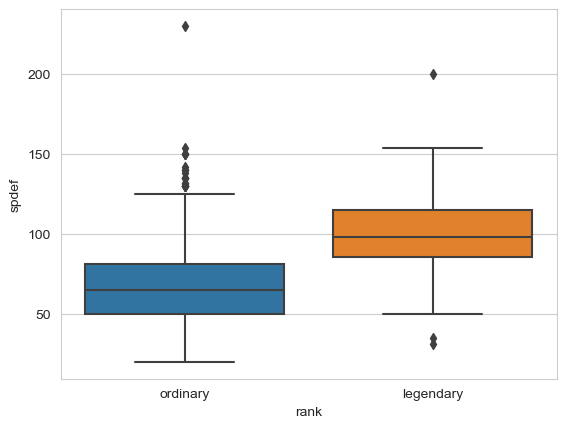

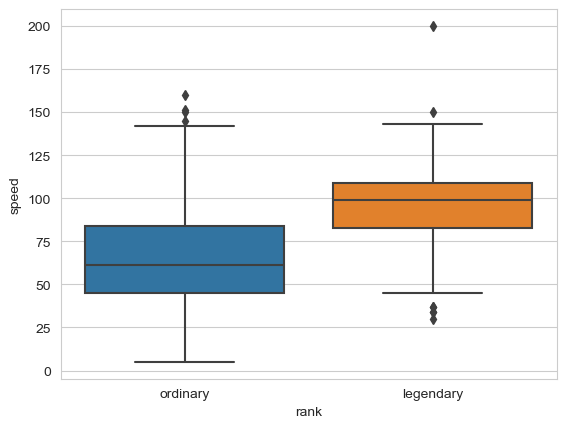

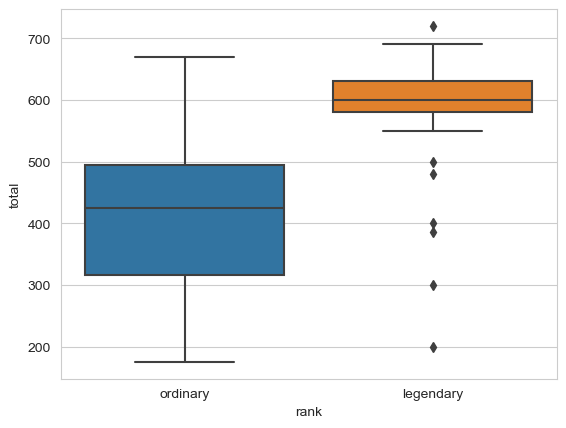

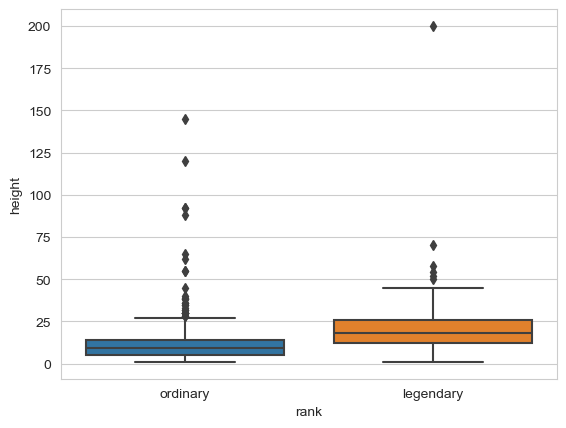

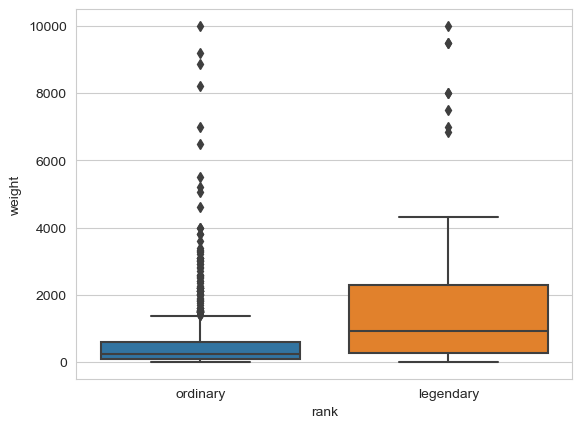

In [10]:
for col_names in pokemon_data.columns[3:]:
    sns.boxplot(x='rank',y=col_names, data=pokemon_data)
    plt.show()

# Training the model

In [17]:
y = big_pokemon_data['rank']

# print(y)
set_of_classes = y.value_counts().index.tolist()
# print(set_of_classes)
set_of_classes= pd.DataFrame({'rank': set_of_classes})
y = pd.get_dummies(y) 
X = big_pokemon_data.drop('rank', axis = 1)

print(y)

# scaler = MinMaxScaler(feature_range=(0, 1))
# X_rescaled = scaler.fit_transform(X)
# X = pd.DataFrame(data = X_rescaled, columns = X.columns)


# code from chat
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)



train, test = train_test_split(big_pokemon_data, test_size=0.2, random_state=21) #splitting the data testsize = 0.2 for 80:20
X_train, y_train = train.drop(columns=['rank']), train['rank'] 
X_test, y_test = test.drop(columns=['rank']), test['rank'] 

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape) #showing the 80:20 split


cls = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2')
cls.fit(X_train, y_train)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, cls.predict(X_test)))


scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)

print(type(X_test_rescaled))

print(X_train_rescaled)
# Create an SVM classifier
svm_cls = SVC(kernel='linear', C=1.0).fit(X_train_rescaled, y_train)

# Make predictions on the test set
y_pred = svm_cls.predict(X_test_rescaled)


# Evaluate the SVM model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))


      legendary  ordinary
0         False      True
0         False      True
0         False      True
0         False      True
0         False      True
...         ...       ...
1016       True     False
1016       True     False
1016       True     False
1016       True     False
1016       True     False

[18360 rows x 2 columns]
Training set shape (X, y): (14688, 9) (14688,)
Testing set shape (X, y): (3672, 9) (3672,)
Logistic Regression Classification Report:
              precision    recall  f1-score   support

   legendary       0.89      0.95      0.92      1786
    ordinary       0.95      0.89      0.92      1886

    accuracy                           0.92      3672
   macro avg       0.92      0.92      0.92      3672
weighted avg       0.92      0.92      0.92      3672

<class 'numpy.ndarray'>
[[0.31889764 0.51704545 0.20444444 ... 0.4440367  0.02512563 0.00230046]
 [0.31102362 0.65340909 0.31111111 ... 0.56880734 0.05025126 0.02590518]
 [0.31102362 0.59659091 0.51111

In [8]:
def predict_legendary(model, scaler, attributes):
    # Create a DataFrame with the given attributes
    pokemon_data = pd.DataFrame([attributes])

    # Scale the features
    pokemon_data_rescaled = scaler.transform(pokemon_data)

    # Make predictions using the model
    prediction = model.predict(pokemon_data_rescaled)

    return prediction



In [9]:
joblib.dump(svm_cls, 'Pokemon_Predictor.pkl')


['Pokemon_Predictor.pkl']

In [29]:
clf = svm_cls
x_min, x_max = X_train_rescaled[:, 0].min() - 1, X_train_rescaled[:, 0].max() + 1
y_min, y_max = X_train_rescaled[:, 1].min() - 1, X_train_rescaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
meshgrid_data_rescaled = scaler.transform(meshgrid_data)
Z = svm_cls.predict(meshgrid_data_rescaled)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)



# model = svm.SVC(kernel='linear')
# clf = model.fit(X_test_rescaled, y_pred)

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Decision surface of linear SVC ')
# # Set-up grid for plotting.

# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.ylabel('y label here')
plt.xlabel('x label here')
plt.xticks(())
plt.yticks(())
plt.title("SVM output")
plt.show()

ValueError: X has 2 features, but SVC is expecting 9 features as input.